In [15]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, random_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
from datetime import datetime

from utils import FaceKeypointDataset, get_train_transforms, get_validation_transforms, visualize_augmented_samples, train, visualize_inference
from model.network import Net

In [17]:
annotations_path  = 'data/Annotations/processed_annotations.csv'
annotations = pd.read_csv(annotations_path)
images_dir = 'data/Images_Processed'

In [27]:
train_transforms = get_train_transforms()
val_transforms = get_validation_transforms()

c:\Users\first\Desktop\GithubForSchool\face-keypoint-detection\.venv\Lib\site-packages\albumentations\core\validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
c:\Users\first\Desktop\GithubForSchool\face-keypoint-detection\.venv\Lib\site-packages\albumentations\core\composition.py:250: UserWarning: Got processor for keypoints, but no transform to process it.
  self._set_keys()


In [28]:
full_dataset = FaceKeypointDataset(
        annotations=annotations,
        root_dir=images_dir,
        transform=train_transforms
    )

In [29]:
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [30]:
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

In [31]:
model = Net()

In [32]:
criterion_keypoints = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

In [33]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

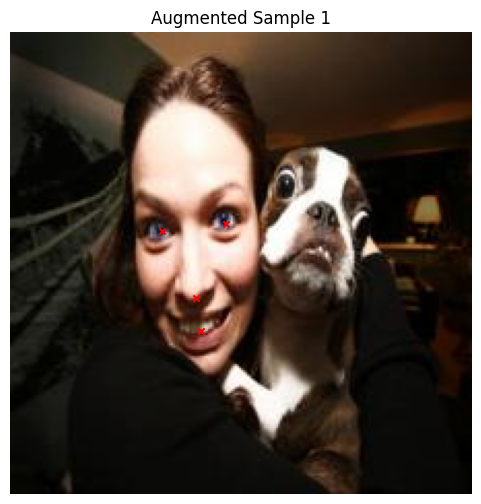

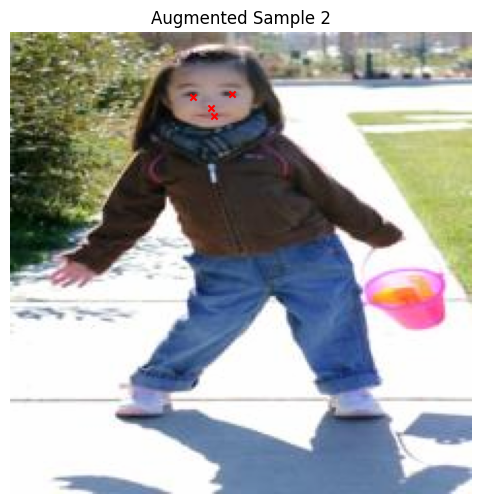

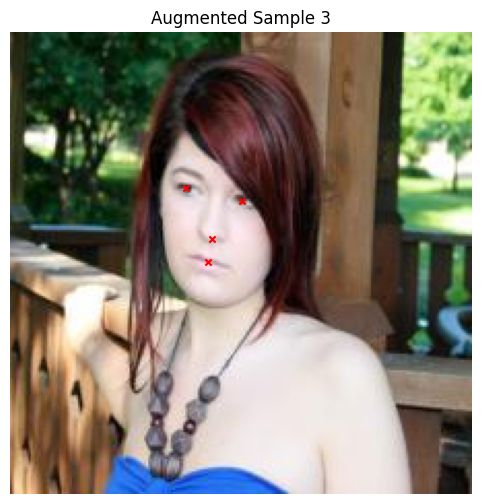

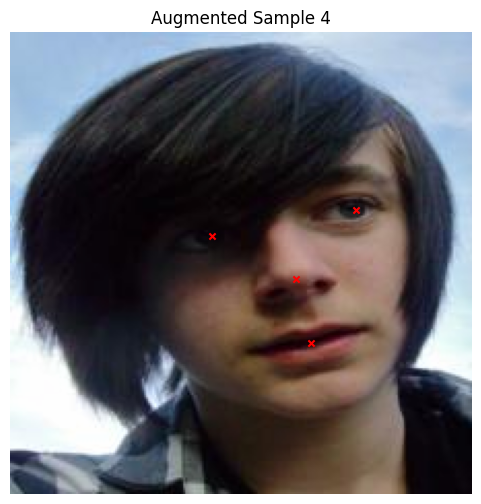

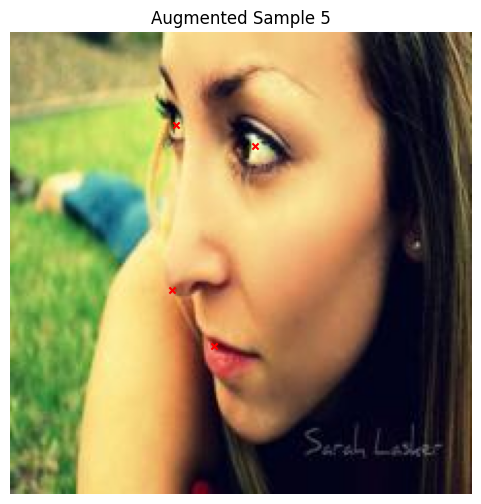

In [35]:
visualize_augmented_samples(train_dataset, num_samples=5)

In [12]:
trained_model, results_df = train(model, 
                      criterion_keypoints, 
                      optimizer, 
                      scheduler, 
                      train_loader, 
                      val_loader, 
                      epochs=100, 
                      device=device, 
                      patience=10)

Epoch 1/100 | Train Loss: 0.0334 | Val Loss: 0.0187
Validation loss decreased. Saving model...


Epoch 2/100 | Train Loss: 0.0219 | Val Loss: 0.0151
Validation loss decreased. Saving model...


Epoch 3/100 | Train Loss: 0.0181 | Val Loss: 0.0128
Validation loss decreased. Saving model...


Epoch 4/100 | Train Loss: 0.0154 | Val Loss: 0.0116
Validation loss decreased. Saving model...


Epoch 5/100 | Train Loss: 0.0139 | Val Loss: 0.0111
Validation loss decreased. Saving model...


Epoch 6/100 | Train Loss: 0.0126 | Val Loss: 0.0098
Validation loss decreased. Saving model...


Epoch 7/100 | Train Loss: 0.0114 | Val Loss: 0.0098
Validation loss decreased. Saving model...


Epoch 8/100 | Train Loss: 0.0104 | Val Loss: 0.0085
Validation loss decreased. Saving model...


Epoch 9/100 | Train Loss: 0.0095 | Val Loss: 0.0080
Validation loss decreased. Saving model...


Epoch 10/100 | Train Loss: 0.0089 | Val Loss: 0.0084
No improvement in validation loss for 1 epoch(s).


Epoch 11/100 | Train Loss: 0.0083 | Val Loss: 0.0076
Validation loss decreased. Saving model...


Epoch 12/100 | Train Loss: 0.0077 | Val Loss: 0.0075
Validation loss decreased. Saving model...


Epoch 13/100 | Train Loss: 0.0071 | Val Loss: 0.0072
Validation loss decreased. Saving model...


Epoch 14/100 | Train Loss: 0.0065 | Val Loss: 0.0074
No improvement in validation loss for 1 epoch(s).


Epoch 15/100 | Train Loss: 0.0061 | Val Loss: 0.0069
Validation loss decreased. Saving model...


Epoch 16/100 | Train Loss: 0.0055 | Val Loss: 0.0068
Validation loss decreased. Saving model...


Epoch 17/100 | Train Loss: 0.0051 | Val Loss: 0.0067
Validation loss decreased. Saving model...


Epoch 18/100 | Train Loss: 0.0049 | Val Loss: 0.0069
No improvement in validation loss for 1 epoch(s).


Epoch 19/100 | Train Loss: 0.0044 | Val Loss: 0.0066
Validation loss decreased. Saving model...


Epoch 20/100 | Train Loss: 0.0041 | Val Loss: 0.0066
No improvement in validation loss for 1 epoch(s).


Epoch 21/100 | Train Loss: 0.0039 | Val Loss: 0.0064
Validation loss decreased. Saving model...


Epoch 22/100 | Train Loss: 0.0037 | Val Loss: 0.0065
No improvement in validation loss for 1 epoch(s).


Epoch 23/100 | Train Loss: 0.0035 | Val Loss: 0.0063
Validation loss decreased. Saving model...


Epoch 24/100 | Train Loss: 0.0033 | Val Loss: 0.0064
No improvement in validation loss for 1 epoch(s).


Epoch 25/100 | Train Loss: 0.0032 | Val Loss: 0.0062
Validation loss decreased. Saving model...


Epoch 26/100 | Train Loss: 0.0030 | Val Loss: 0.0063
No improvement in validation loss for 1 epoch(s).


Epoch 27/100 | Train Loss: 0.0029 | Val Loss: 0.0061
Validation loss decreased. Saving model...


Epoch 28/100 | Train Loss: 0.0029 | Val Loss: 0.0061
No improvement in validation loss for 1 epoch(s).


Epoch 29/100 | Train Loss: 0.0027 | Val Loss: 0.0061
No improvement in validation loss for 2 epoch(s).


Epoch 30/100 | Train Loss: 0.0027 | Val Loss: 0.0061
No improvement in validation loss for 3 epoch(s).


Epoch 31/100 | Train Loss: 0.0026 | Val Loss: 0.0059
Validation loss decreased. Saving model...


Epoch 32/100 | Train Loss: 0.0025 | Val Loss: 0.0060
No improvement in validation loss for 1 epoch(s).


Epoch 33/100 | Train Loss: 0.0025 | Val Loss: 0.0058
Validation loss decreased. Saving model...


Epoch 34/100 | Train Loss: 0.0024 | Val Loss: 0.0060
No improvement in validation loss for 1 epoch(s).


Epoch 35/100 | Train Loss: 0.0024 | Val Loss: 0.0060
No improvement in validation loss for 2 epoch(s).


Epoch 36/100 | Train Loss: 0.0023 | Val Loss: 0.0057
Validation loss decreased. Saving model...


Epoch 37/100 | Train Loss: 0.0022 | Val Loss: 0.0058
No improvement in validation loss for 1 epoch(s).


Epoch 38/100 | Train Loss: 0.0022 | Val Loss: 0.0058
No improvement in validation loss for 2 epoch(s).


Epoch 39/100 | Train Loss: 0.0022 | Val Loss: 0.0058
No improvement in validation loss for 3 epoch(s).


Epoch 40/100 | Train Loss: 0.0022 | Val Loss: 0.0060
No improvement in validation loss for 4 epoch(s).


Epoch 41/100 | Train Loss: 0.0021 | Val Loss: 0.0057
Validation loss decreased. Saving model...


Epoch 42/100 | Train Loss: 0.0021 | Val Loss: 0.0057
No improvement in validation loss for 1 epoch(s).


Epoch 43/100 | Train Loss: 0.0021 | Val Loss: 0.0058
No improvement in validation loss for 2 epoch(s).


Epoch 44/100 | Train Loss: 0.0020 | Val Loss: 0.0057
Validation loss decreased. Saving model...


Epoch 45/100 | Train Loss: 0.0020 | Val Loss: 0.0057
No improvement in validation loss for 1 epoch(s).


Epoch 46/100 | Train Loss: 0.0020 | Val Loss: 0.0054
Validation loss decreased. Saving model...


Epoch 47/100 | Train Loss: 0.0020 | Val Loss: 0.0055
No improvement in validation loss for 1 epoch(s).


Epoch 48/100 | Train Loss: 0.0020 | Val Loss: 0.0055
No improvement in validation loss for 2 epoch(s).


Epoch 49/100 | Train Loss: 0.0019 | Val Loss: 0.0055
No improvement in validation loss for 3 epoch(s).


Epoch 50/100 | Train Loss: 0.0018 | Val Loss: 0.0055
No improvement in validation loss for 4 epoch(s).


Epoch 51/100 | Train Loss: 0.0019 | Val Loss: 0.0055
No improvement in validation loss for 5 epoch(s).


Epoch 52/100 | Train Loss: 0.0018 | Val Loss: 0.0054
Validation loss decreased. Saving model...


Epoch 53/100 | Train Loss: 0.0018 | Val Loss: 0.0056
No improvement in validation loss for 1 epoch(s).


Epoch 54/100 | Train Loss: 0.0018 | Val Loss: 0.0055
No improvement in validation loss for 2 epoch(s).


Epoch 55/100 | Train Loss: 0.0018 | Val Loss: 0.0055
No improvement in validation loss for 3 epoch(s).


Epoch 56/100 | Train Loss: 0.0018 | Val Loss: 0.0056
No improvement in validation loss for 4 epoch(s).


Epoch 57/100 | Train Loss: 0.0018 | Val Loss: 0.0054
No improvement in validation loss for 5 epoch(s).


Epoch 58/100 | Train Loss: 0.0017 | Val Loss: 0.0055
No improvement in validation loss for 6 epoch(s).


Epoch 59/100 | Train Loss: 0.0016 | Val Loss: 0.0052
Validation loss decreased. Saving model...


Epoch 60/100 | Train Loss: 0.0015 | Val Loss: 0.0052
No improvement in validation loss for 1 epoch(s).


Epoch 61/100 | Train Loss: 0.0015 | Val Loss: 0.0052
Validation loss decreased. Saving model...


Epoch 62/100 | Train Loss: 0.0014 | Val Loss: 0.0051
Validation loss decreased. Saving model...


Epoch 63/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 1 epoch(s).


Epoch 64/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 2 epoch(s).


Epoch 65/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 3 epoch(s).


Epoch 66/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 4 epoch(s).


Epoch 67/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 5 epoch(s).


Epoch 68/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 6 epoch(s).


Epoch 69/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 7 epoch(s).


Epoch 70/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 8 epoch(s).


Epoch 71/100 | Train Loss: 0.0013 | Val Loss: 0.0052
No improvement in validation loss for 9 epoch(s).


Epoch 72/100 | Train Loss: 0.0014 | Val Loss: 0.0052
No improvement in validation loss for 10 epoch(s).
Early stopping triggered!


In [13]:
results_df.to_csv('training_results.csv', index=False)

C:\Users\first\AppData\Local\Temp\ipykernel_23432\2150509748.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_keypoint_model.pth'))

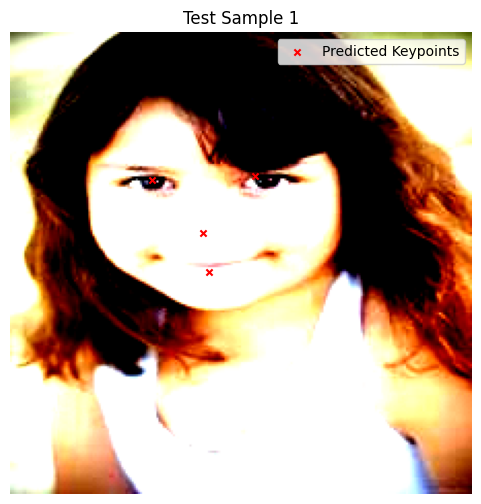

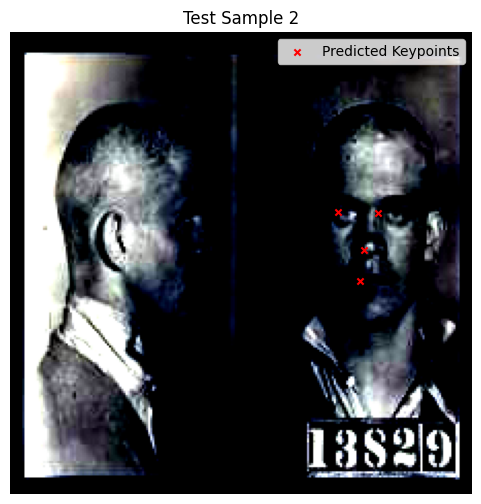

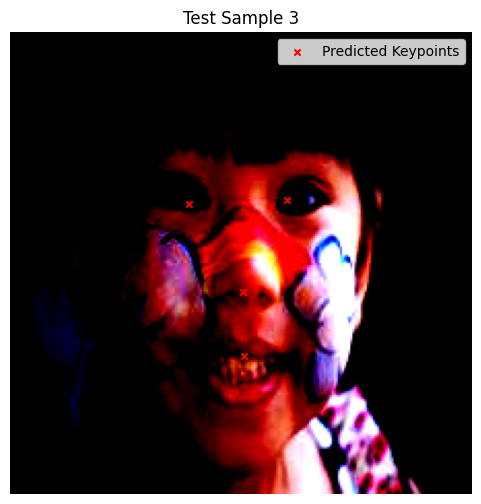

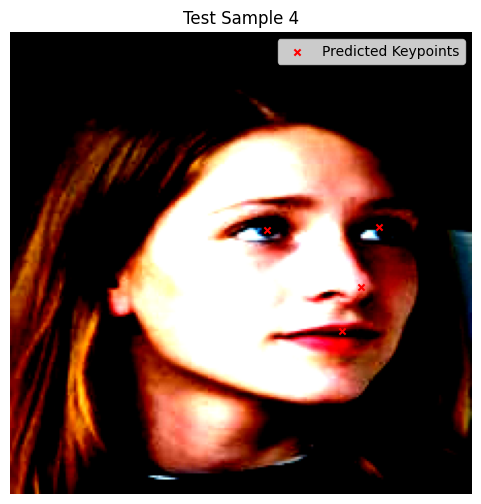

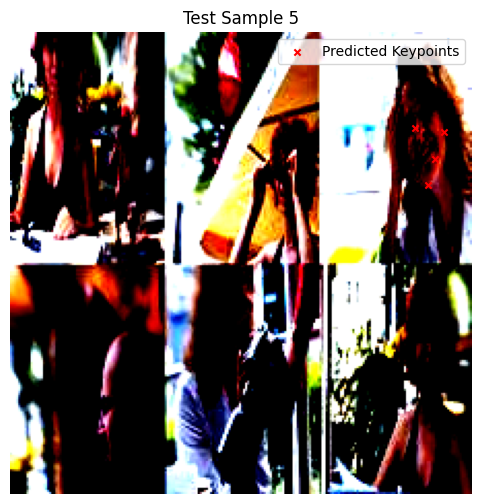

In [36]:
model = Net()
model.load_state_dict(torch.load('best_keypoint_model.pth'))
visualize_inference(model, val_dataset, device='cuda', num_samples=5)